# Data Analyst Nanodegree

## Project 2 - Titanic Survival Exploration
Author: Linh Trieu

Titanic Data - Contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic.

To begin working with the Titanic passenger data, I first imported the libraries, and loaded data into a pandas DataFrame.

In [69]:
#Load libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

%matplotlib inline

#Load data into python
df_titanic = pd.read_csv("C:/Users/Linh/OneDrive/STUDY/Data Science/Python/titanic-data.csv")

### Part One: Data Exploration

In [70]:
#Print the first 5 rows 
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [71]:
#See the last 5 rows
df_titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


From the head and tail, we have definition of variables: 

* **Survived:** Outcome of survival (0 = No; 1 = Yes)
* **Pclass:** Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
* **Name:** Name of passenger
* **Sex:** Sex of the passenger
* **Age:** Age of the passenger (Some entries contain NaN)
* **SibSp:** Number of siblings and spouses of the passenger aboard
* **Parch:** Number of parents and children of the passenger aboard
* **Ticket:** Ticket number of the passenger
* **Fare:** Fare paid by the passenger
* **Cabin:** Cabin number of the passenger (Some entries contain NaN)
* **Embarked:** Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)

In [29]:
#Check data types of variables in the dataset
df_titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [30]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


* From the results, there are 891 rows for each column. 
* Missing values are in Age, Cabin, Embarked. 
* Objects are considered as string in pandas.

In [10]:
#Descriptive Statistics
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Mean age is 29.699 while youngest person is about 5 month old, oldest person is 80 years old.

In [31]:
#Males and females breakdown 
sex = df_titanic.groupby('Sex').count()
sex

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,,
female,314,314,314,314,261,314,314,314,314,97,312
male,577,577,577,577,453,577,577,577,577,107,577


Among all passenger, there are 314 females and 577 males. 
Since age, cabin, and embarked have missing values, they do not reflect the same number as in others. 

In [33]:
#Group by two columns and count and access PassengerId column
s = df_titanic.groupby(['Sex', 'Survived']).count()
s['PassengerId']

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: PassengerId, dtype: int64

Now, we find out that among 233/314 females survived, while 109/577 males survived. 

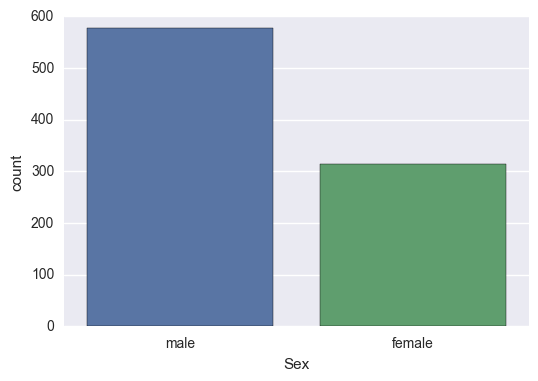

In [16]:
#Males > Females
sns.countplot(x="Sex", data=df_titanic);

Visualized number of males and females. 

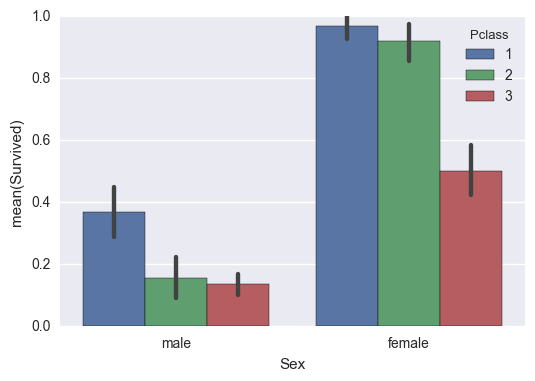

In [35]:
#Mean survied between variables using seaborn
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=df_titanic);

* The graph shows that mean survived of females is more than males
* Pclass 1 and 2 has higher chance of survivals for males and females compared to Pclass 3

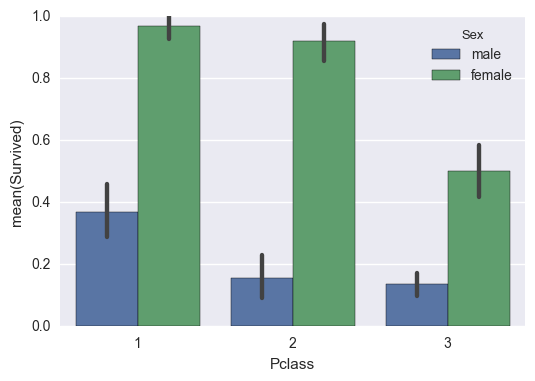

In [18]:
#in another way, do 3 classes in x
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=df_titanic);

Different view of mean survived between males/females and Pclass

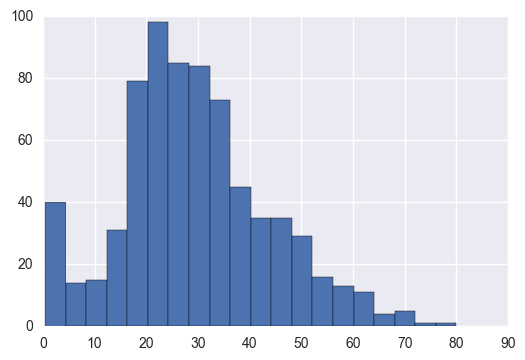

In [38]:
#Histogram
df_titanic['Age'].hist(bins=20)

* Set 25 bins in Age histogram 
* The result indicates that most people are 20-30 years old, which explains that they might have travelled with children under than 5, therefore, bin of children under 5 is considerably high. 

In [21]:
#Assume children who are 16 or younger is called "Child"
def set_child(passenger):
    Age, Sex = passenger
    if Age <= 16:
        return 'child'
    else:
        return Sex

In [39]:
#Add Person column applying set_child above
df_titanic['Person'] = df_titanic[['Age', 'Sex']].apply(set_child, axis=1)

In [46]:
df_titanic.iloc[:, [0,4,5,12]][0:10]

,PassengerId,Sex,Age,Person
0,1,male,22.0,male
1,2,female,38.0,female
2,3,female,26.0,female
3,4,female,35.0,female
4,5,male,35.0,male
5,6,male,NaN,male
6,7,male,54.0,male
7,8,male,2.0,child
8,9,female,27.0,female
9,10,female,14.0,child


In the new column added, Person, those who were under 16 are classified as child. 

In [24]:
#Count number of children
df_titanic['Person'].value_counts()

male      526
female    265
child     100
Name: Person, dtype: int64

Now there are 526 males, 265 female, and 100 children. This helps us explore the data set in more details.

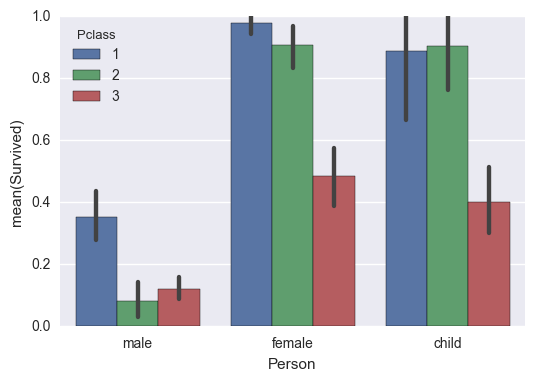

In [47]:
sns.barplot(x="Person", y="Survived", hue="Pclass", data=df_titanic);

* Recheck mean survival after grouping child separately
* Female and Child charts look similar. This could mean that the children were more likely with their moms when the ship sunk. 

In [48]:
#Group by Person and Survived
s2 = df_titanic.groupby(['Person', 'Survived']).count()
s2['PassengerId']

Person  Survived
child   0            45
        1            55
female  0            65
        1           200
male    0           439
        1            87
Name: PassengerId, dtype: int64

New result allows us to know that 55 children survived.

### Part Two: Data Munging

In [72]:
#Handle missing data
meanAge = np.mean(df_titanic.Age)
df_titanic.Age = df_titanic.Age.fillna(meanAge)

In [73]:
df_titanic.iloc[:,[0,5]].head(10)

,PassengerId,Age
0,1,22.000000
1,2,38.000000
2,3,26.000000
3,4,35.000000
4,5,35.000000
5,6,29.699118
6,7,54.000000
7,8,2.000000
8,9,27.000000
9,10,14.000000


PassengerID 6 got Age replaced by mean Age of 29.699

In [74]:
#Check Cabin variable
sum(df_titanic['Cabin'].isnull()) 

687

* There are 891 entries and 687 of them are missing. Thus, Cabin should be dropped.
* Ticket has number and text mixed, also has missing values. It looks like Ticket would mess up the analysis, thus, Ticket should also be dropped. 

In [81]:
#Drop Cabin variable
df_titanic_copy = df_titanic.drop(['Ticket', 'Cabin'], axis=1)
df_titanic_copy.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
